In [4]:
import sys, os

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.conf.binary_entropy_conf import BinaryEntropyConf
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
from hydra import compose, initialize
from omegaconf import OmegaConf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


In [ ]:
data = BinaryEntropyConf.generate_data_rolling_ate(100, uniform_confounder_entropy=True, noise=False, h_target=0.5)
scenario = BinaryEntropyConf(data)
ATE_algs = ['ATE_tianpearl', 'ATE_entropybounds-trueTheta']
PNS_algs = ['PNS_tianpearl', 'PNS_entropybounds-trueTheta']
algs = ATE_algs + PNS_algs

runtimes = scenario.run(algs)
scenario.data

Running ATE_tianpearl...
ATE_tianpearl completed in 0.50 seconds.
Running ATE_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error in LDL factorization when computing the nonzero elements. The problem seems to be non-convex.
factor_status: 0, num_vars: 8
Error in LDL initial factorization.
ERROR: init_lin_sys_work failure
ATE_entropybounds-trueTheta completed in 20.39 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.04 seconds.
Running PNS_entropybounds-trueTheta...
PNS_entropybounds-trueTheta completed in 8.87 seconds.
Total runtime: 29.81 seconds.


,seed,intercept_X,intercept_Y,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,U,X,Y,epsilon_X,epsilon_Y,noise,entropy_U,entropy_X,entropy_Y,squasher_X_name,squasher_Y_name,heteroskedasticity_structure,ATE_tianpearl_bound_lower,ATE_tianpearl_bound_upper,ATE_tianpearl_bound_width,ATE_tianpearl_bound_failed,ATE_tianpearl_bound_valid,ATE_entropybounds-trueTheta_bound_lower,ATE_entropybounds-trueTheta_bound_upper,ATE_entropybounds-trueTheta_bound_valid,ATE_entropybounds-trueTheta_bound_width,ATE_entropybounds-trueTheta_bound_failed,ATE_entropybounds-trueTheta_theta,PNS_tianpearl_bound_lower,PNS_tianpearl_bound_upper,PNS_tianpearl_bound_width,PNS_tianpearl_bound_failed,PNS_tianpearl_bound_valid,PNS_entropybounds-trueTheta_bound_lower,PNS_entropybounds-trueTheta_bound_upper,PNS_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_width,PNS_entropybounds-trueTheta_bound_failed,PNS_entropybounds-trueTheta_theta
0,467521,0.366161,1.297121,-0.564556,-5.00000,-0.997449,-0.619494,5.556302e-07,1.930427e-06,0.619496,0.987013,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, ...","[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.052915,0.990932,0.914926,probit,probit,"sigma_i ~ |N(0,1)| for each unit",-1.000000,-0.187050,0.812950,False,True,-0.616160,-0.323907,False,0.292254,False,0.052915,0.0,0.226,0.226,False,True,0.000000e+00,0.062509,True,0.062509,False,0.052915
1,842025,-1.087476,-1.525135,1.203625,-4.89899,-0.579318,-0.102744,8.181900e-04,9.131954e-04,0.103658,0.987013,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.067222,0.986617,0.335334,softplus,softplus,"sigma_i ~ |N(0,1)| for each unit",-1.000000,0.781690,1.781690,False,True,-0.626392,-0.295606,False,0.330786,False,0.067222,0.0,0.506,0.506,False,True,0.000000e+00,0.082405,True,0.082405,False,0.067222
2,493520,0.125310,0.088497,-0.569320,-4.79798,-0.418883,-0.414274,3.444669e-03,5.952073e-03,0.420226,0.987013,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.141441,0.895469,0.847146,tanh_scaled,sigmoid,"sigma_i ~ |N(0,1)| for each unit",-0.987179,0.209302,1.196482,False,True,-0.630845,-0.121864,True,0.508982,False,0.141441,0.0,0.418,0.418,False,True,0.000000e+00,0.289874,True,0.289874,False,0.141441
3,739446,-1.280280,-2.496779,1.775072,-4.69697,0.986120,-0.007371,6.135142e-07,6.202711e-07,0.007372,0.012987,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.118350,0.443111,0.093778,tanh_scaled,tanh_scaled,"sigma_i ~ |N(0,1)| for each unit",-1.000000,0.973568,1.973568,False,True,-0.545998,0.108176,True,0.654174,False,0.118350,0.0,0.896,0.896,False,True,7.785211e-06,0.850181,False,0.850173,False,0.118350
4,849555,0.802800,1.357549,-0.333691,-4.59596,-1.325174,-0.406817,6.104185e-03,1.058565e-02,0.417402,0.987013,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.093778,0.906543,0.551928,probit,softplus,"sigma_i ~ |N(0,1)| for each unit",-0.982301,0.242236,1.224537,False,True,-0.729753,-0.189026,True,0.540727,False,0.093778,0.0,0.206,0.206,F

In [34]:
subset = scenario.data[scenario.data['entropy_U'] < 0.1]
subset.shape[0]

61

                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
ATE_entropybounds-trueTheta          0.00            42.62          0.6163      1.2061          8.14
              ATE_tianpearl          0.00             1.64          0.9896      1.0061          0.10


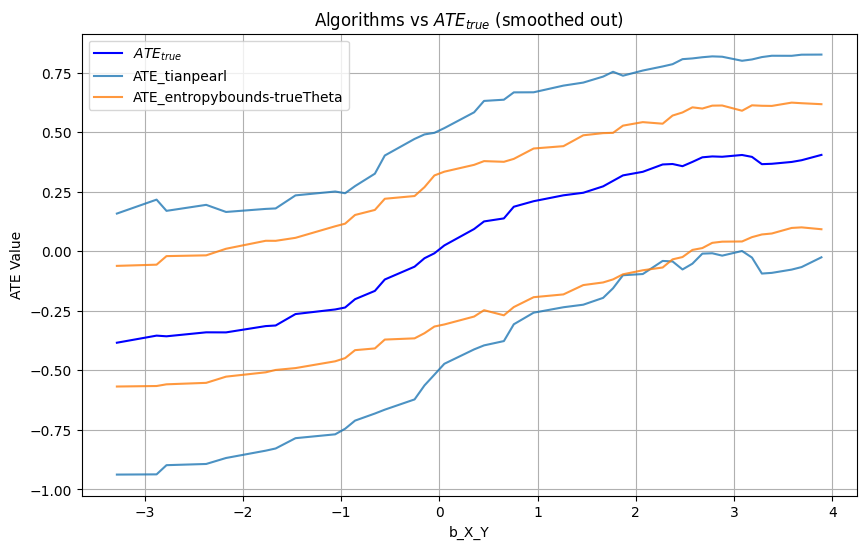

In [33]:
#ATE Evaluation
PlottingUtil.print_bound_statistics_table(subset, ATE_algs, 'ATE')
PlottingUtil.plot_smoothed_query_vs_bounds(subset, 'ATE', ATE_algs, 20)

                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
PNS_entropybounds-trueTheta          0.00             0.00          0.4494      0.4494           N/A
              PNS_tianpearl          0.00             0.00          0.5465      0.5465           N/A


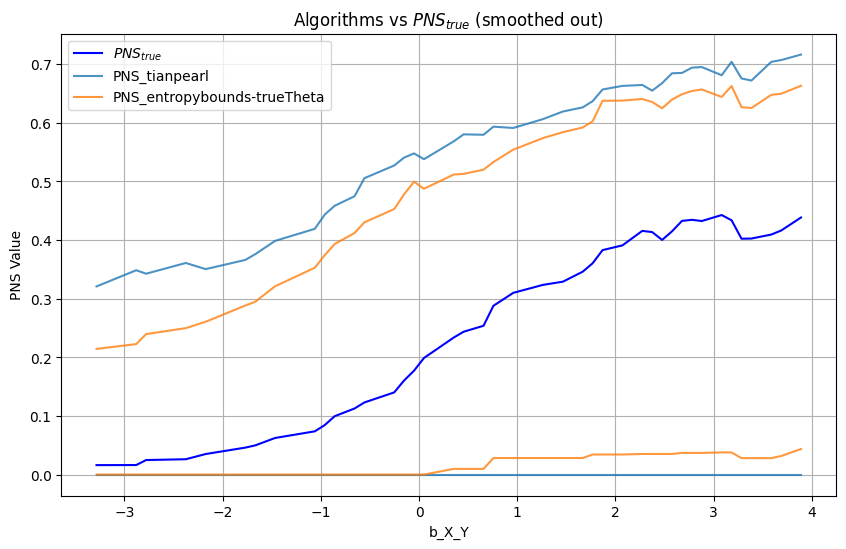

In [35]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(subset, PNS_algs, 'PNS')
PlottingUtil.plot_smoothed_query_vs_bounds(subset, 'PNS', PNS_algs, 20)

In [20]:
# randomize b_X_Y as well
data = []
for i in range(2000):
    sim = BinaryIV._simulate_deterministic_data(uniform_confounder_entropy=True)
    data.append(sim)
data = pd.DataFrame(data)
binaryIV = BinaryIV('IV Dag', data)

In [11]:
data['entropy_U'].describe()

count    2000.000000
mean        0.505965
std         0.295366
min        -0.000000
25%         0.251388
50%         0.517753
75%         0.770973
max         0.999988
Name: entropy_U, dtype: float64

## Randomized entropy
* entropy(U) is randomized
* theta is set to true UB(entropy(U))


In [21]:
binaryIV.run(['ATE_entropybounds-trueTheta', 'ATE_tianpearl'])
binaryIV.run(['PNS_entropybounds-trueTheta', 'PNS_tianpearl'])
results = binaryIV.data


Running ATE_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ATE_entropybounds-trueTheta completed in 266.75 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.71 seconds.
Total runtime: 267.46 seconds.
Running PNS_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


PNS_entropybounds-trueTheta completed in 148.47 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.83 seconds.
Total runtime: 149.31 seconds.


                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
              ATE_tianpearl          0.00            13.10          0.6378      0.8163          3.47
ATE_entropybounds-trueTheta          0.00             5.65          0.9251      0.9858          5.02
                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 1887
Model:                            GLM   Df Residuals:                     1884
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -232.56
Date:                Tue, 10 Jun 2025   Deviance:                       51.307
Time:                        18:40:04   Pearson chi2:                     62.4
No. Iterations:                     9   Pseudo R-squ. (CS):      

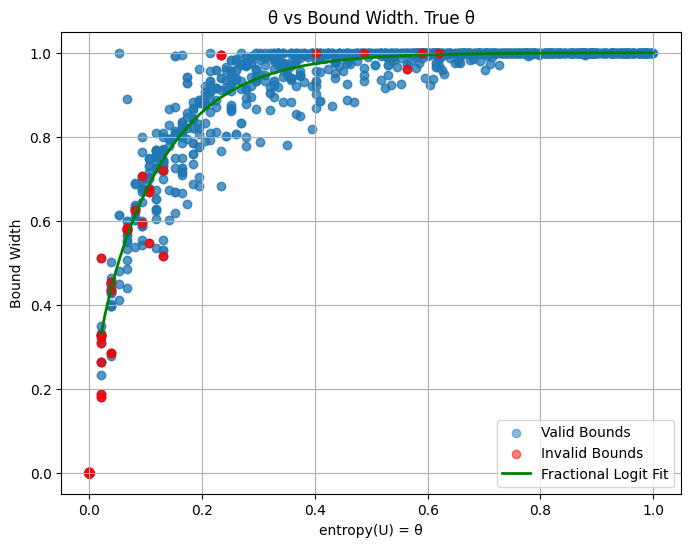

In [24]:
PlottingUtil.print_bound_statistics_table(results, ['ATE_entropybounds-trueTheta', 'ATE_tianpearl'], 'ATE')
PlottingUtil.plot_trueEntropyUB_vs_bound_width(results, 'ATE_entropybounds-trueTheta')


                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
              PNS_tianpearl          0.00             5.70          0.2643      0.3063          3.02
PNS_entropybounds-trueTheta          0.00             0.10          0.6789      0.6792          5.42
                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 1998
Model:                            GLM   Df Residuals:                     1995
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.34
Date:                Tue, 10 Jun 2025   Deviance:                       159.94
Time:                        18:41:12   Pearson chi2:                     158.
No. Iterations:                     4   Pseudo R-squ. (CS):      

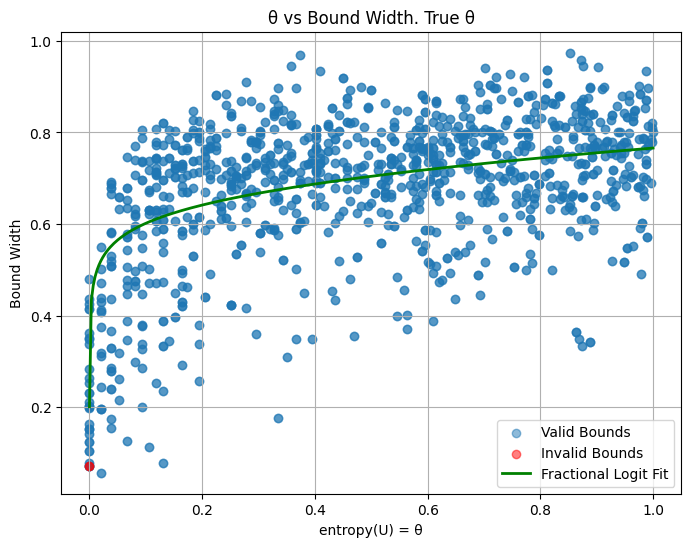

In [25]:
PlottingUtil.print_bound_statistics_table(results, ['PNS_entropybounds-trueTheta', 'PNS_tianpearl'], 'PNS')
PlottingUtil.plot_trueEntropyUB_vs_bound_width(results, 'PNS_entropybounds-trueTheta')


## Randomized Theta

In [84]:
data
binaryIV.run(['PNS_entropybounds-randomTheta'])
results_randomTheta = binaryIV.data

Running PNS_entropybounds-randomTheta...


d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\entropybounds.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.at[idx, f"{query}_entropybounds-{theta_rounded}_bound_width"] = bounds_width
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\entropybounds.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.at[idx, f"{query}_entropybounds-{theta_rounded}_bound_failed"] = failed
d:\TUM Workspace\Thesis Workspace\causal-boun

PNS_entropybounds-randomTheta completed in 85.37 seconds.
Total runtime: 85.40 seconds.


In [22]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(results, ['PNS_entropybounds-randomTheta'], 'PNS')


                    Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Avg. Invalid dist.
PNS_entropybounds-randomTheta           N/A              N/A             N/A                N/A


                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -844.31
Date:                Tue, 10 Jun 2025   Deviance:                       146.53
Time:                        15:10:07   Pearson chi2:                     144.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01931
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2553      0.294      4.266      0.0

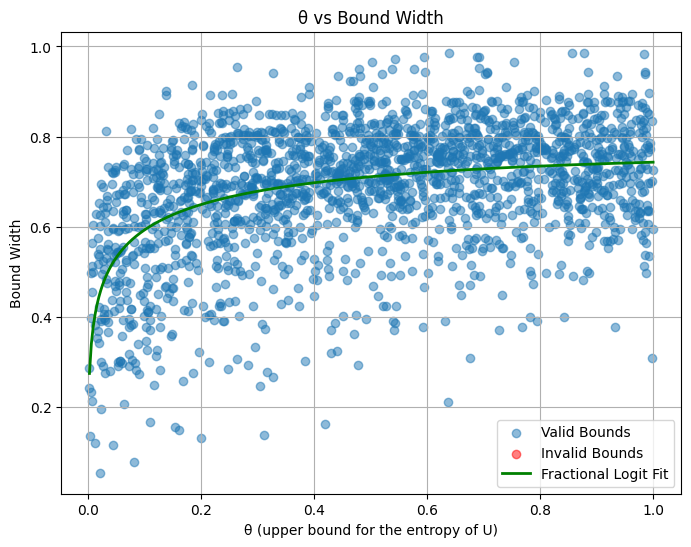

In [93]:
PlottingUtil.randomized_entropyUB_vs_bound_width(results, 'PNS_entropybounds-randomTheta')